# My Data Analytics repository [link](https://github.com/DishaCoder/data-and-analytics)

## Predicting water potability

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading water potability data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Term 2/Term 2 Data Visualization/water_potability.csv")
df.head()

ph    Hardness        Solids  ...  Trihalomethanes  Turbidity  Potability
0       NaN  204.890455  20791.318981  ...        86.990970   2.963135           0
1  3.716080  129.422921  18630.057858  ...        56.329076   4.500656           0
2  8.099124  224.236259  19909.541732  ...        66.420093   3.055934           0
3  8.316766  214.373394  22018.417441  ...       100.341674   4.628771           0
4  9.092223  181.101509  17978.986339  ...        31.997993   4.075075           0

[5 rows x 10 columns]

In [ ]:
df.shape

(3276, 10)

## Exploratory data analysis

In [ ]:
df.info

<bound method DataFrame.info of             ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]>

In [ ]:
df.describe()

ph     Hardness  ...    Turbidity   Potability
count  2785.000000  3276.000000  ...  3276.000000  3276.000000
mean      7.080795   196.369496  ...     3.966786     0.390110
std       1.594320    32.879761  ...     0.780382     0.487849
min       0.000000    47.432000  ...     1.450000     0.000000
25%       6.093092   176.850538  ...     3.439711     0.000000
50%       7.036752   196.967627  ...     3.955028     0.000000
75%       8.062066   216.667456  ...     4.500320     1.000000
max      14.000000   323.124000  ...     6.739000     1.000000

[8 rows x 10 columns]

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Hence, in this dataset only 3 columns has null values. 
In this project, we have predicted potability 


1.   Without handling null values
2.   Replacing null values with the column mean. 
 and will compair results.



## Plotting graphs 

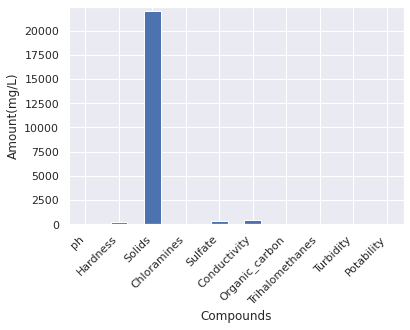

In [ ]:
sns.set()

fig = df.mean().plot(kind='bar')
plt.margins(0.02)
plt.xlabel('Compounds')
plt.ylabel('Amount(mg/L)')
fig.set_xticklabels(df.columns, rotation = 45, ha="right")
plt.show()

Here we can observer that the amount of **Solids** is the highest amongst all other chemical compounds. So let's seperatly plot it.

In [ ]:
df_less = df.drop(['Solids','Conductivity'], axis=1)

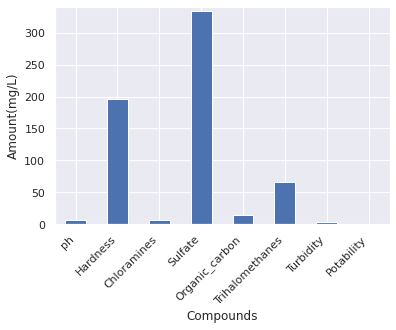

In [ ]:
sns.set()

fig = df_less.mean().plot(kind='bar')
plt.margins(0.02)
plt.xlabel('Compounds')
plt.ylabel('Amount(mg/L)')
fig.set_xticklabels(df_less.columns, rotation = 45, ha="right")
plt.show()

Finding out the most important variables

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


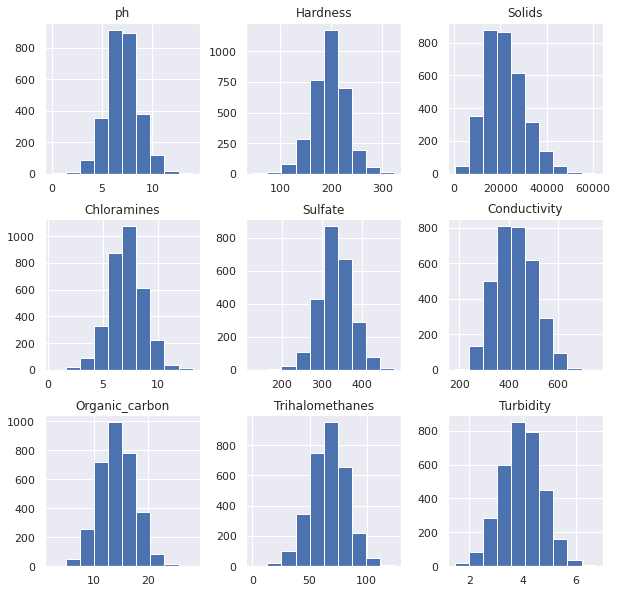

In [ ]:
fig = plt.figure(figsize = (10,10))
var = df.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();

After solids, means of sulfate, Hardness and Thrihalomethanes are hign in value. Let's plot pairplot to see individual relationship among all attributes.

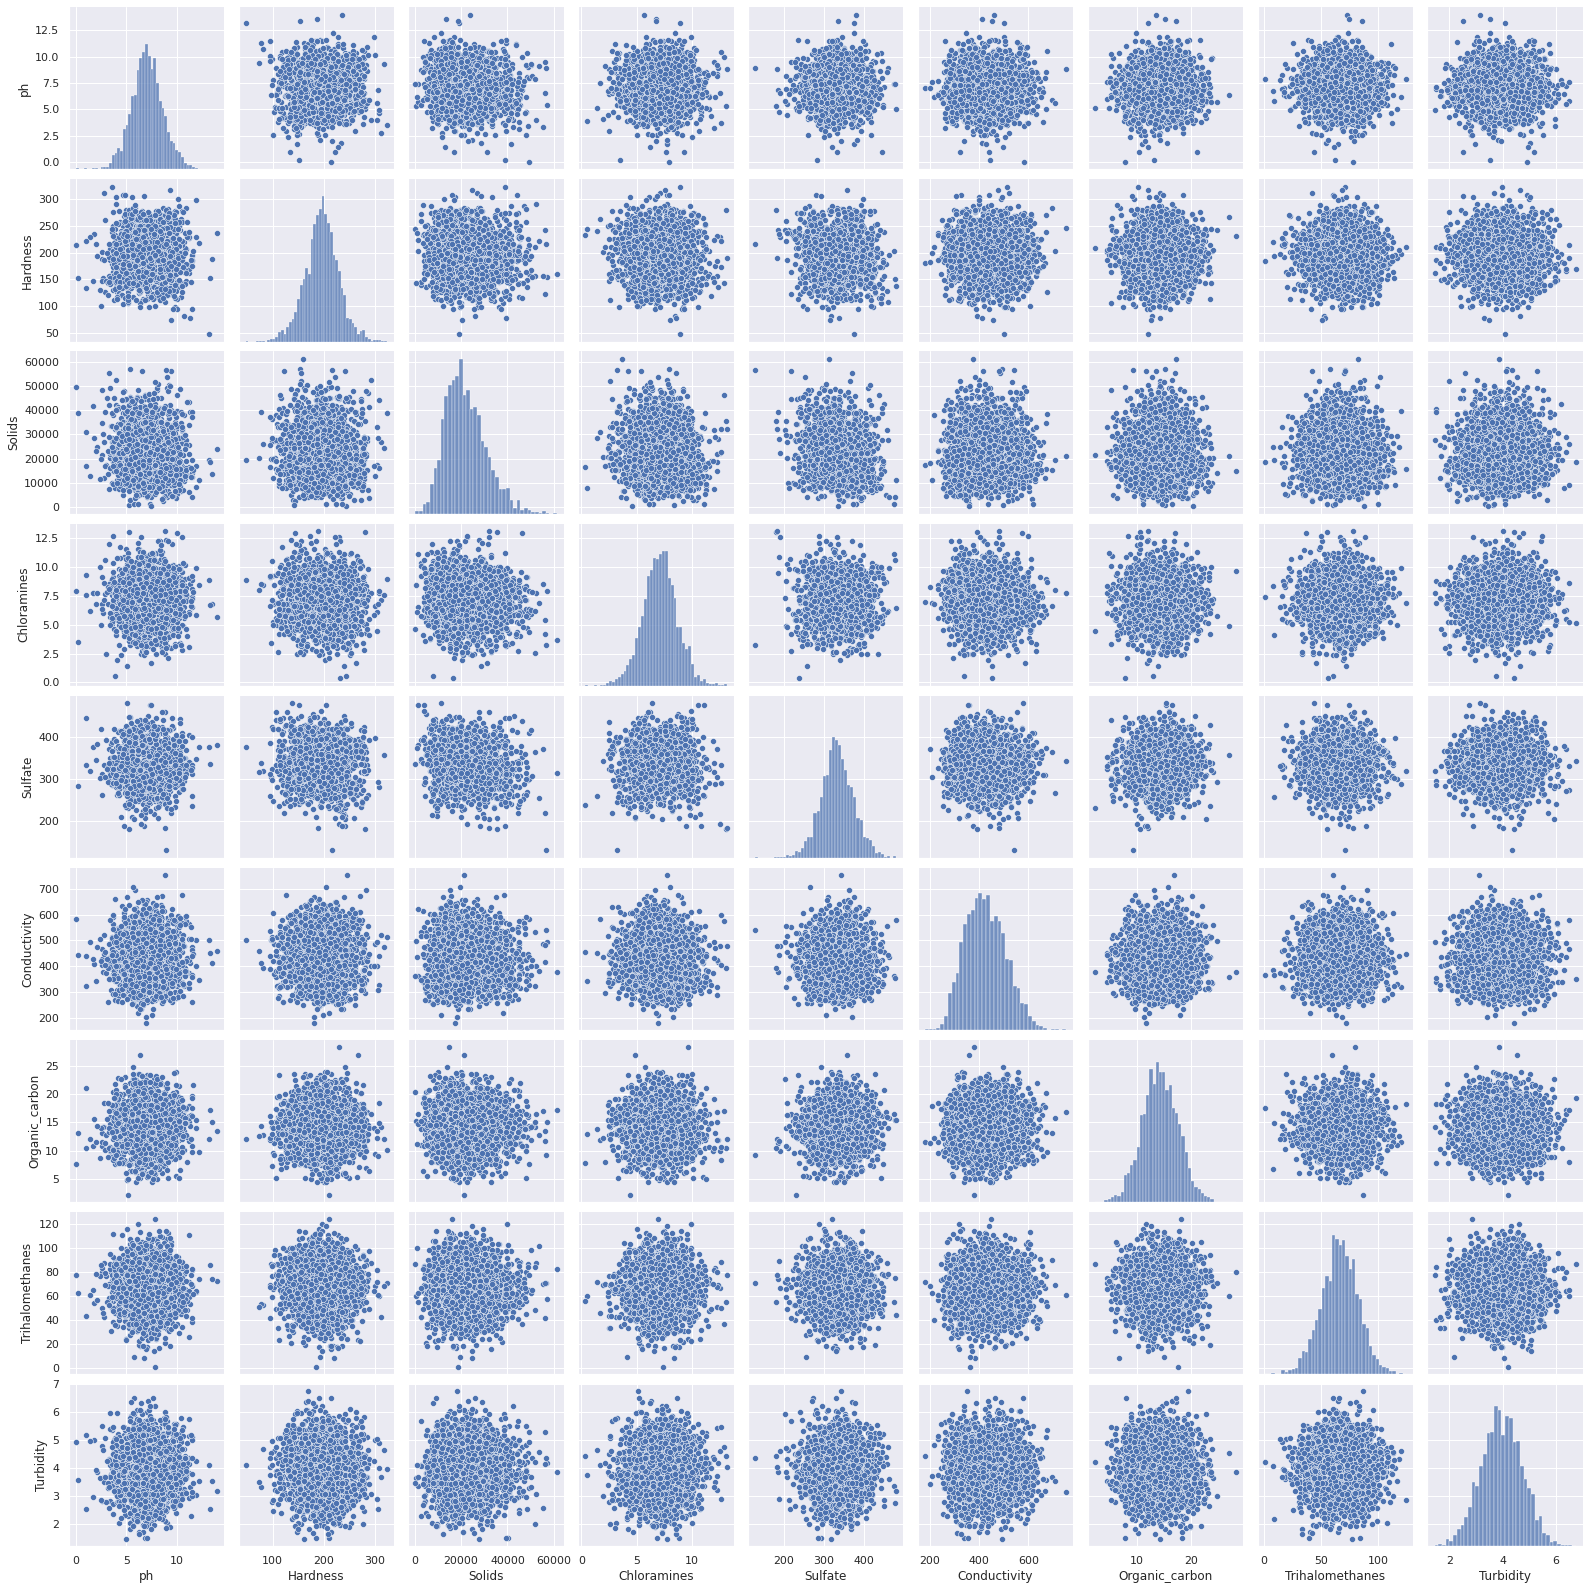

In [ ]:
sns.pairplot(df.drop('Potability', axis=1))

From above plot, we can say that the data is equaly destributed

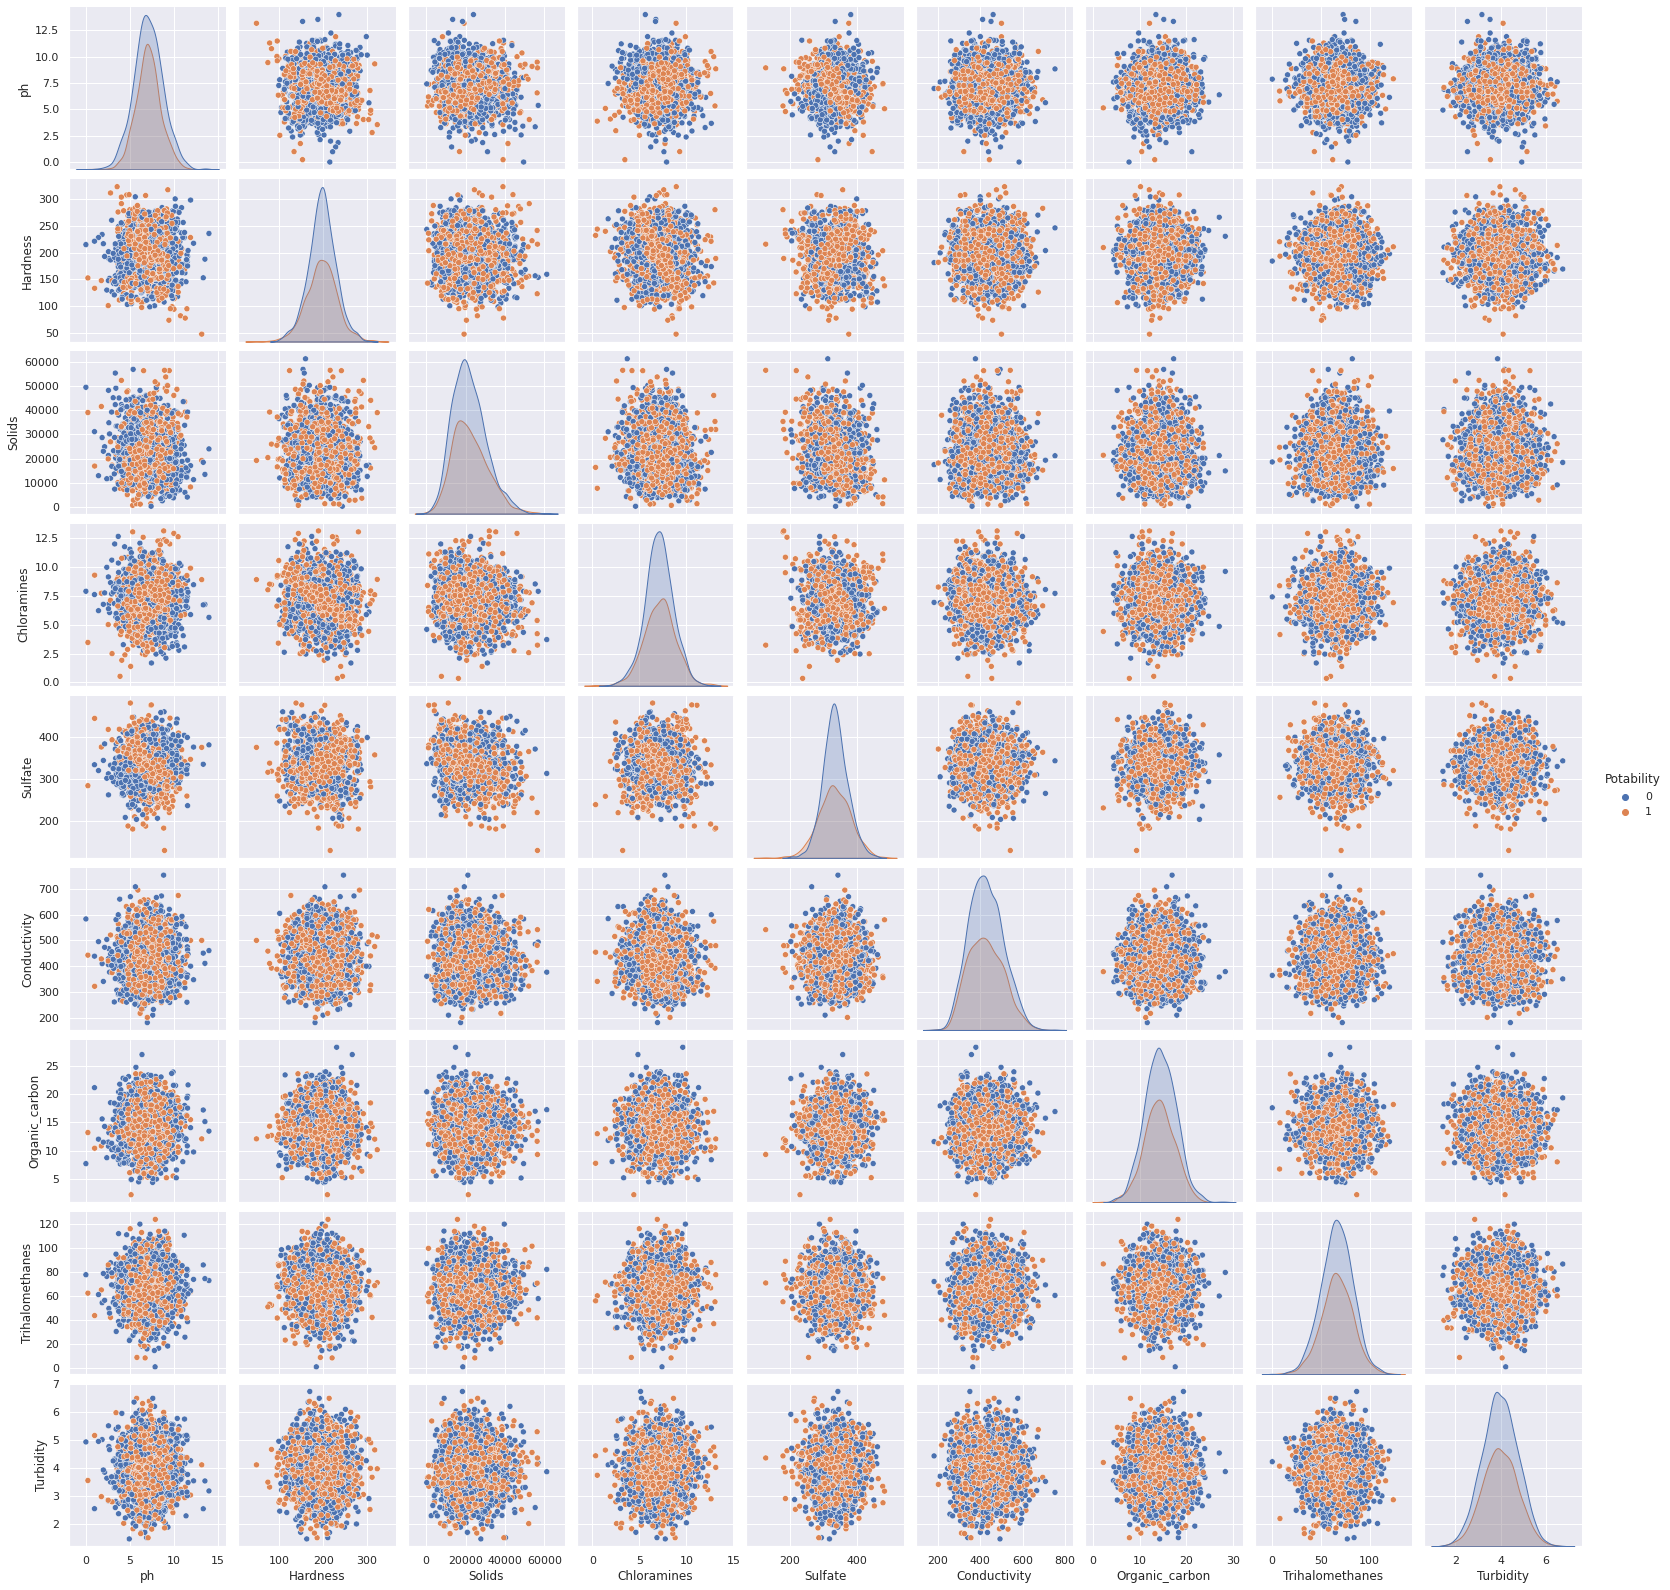

In [ ]:
sns.pairplot(df, hue='Potability')

In the above pairplot, I have given potability as a hue parameter. So, blue points indicates potability as '0' and red ones are for potability = '1' 

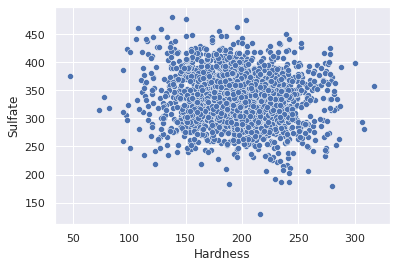

In [ ]:
sns.scatterplot(x="Hardness", y="Sulfate", data=df);


In [ ]:
import plotly.graph_objects as go
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px


In [ ]:
# Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_1 = sc.fit_transform(df.iloc[:, :-1])
df_scaled = pd.DataFrame(df_1, columns = df.columns[:-1])
df_scaled['Potability'] = df['Potability']

In [ ]:
fig = go.Figure()
columns = df.columns
colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 9, colortype='rgb')
for idx, color in enumerate(colors):
  fig.add_trace(go.Violin(x=df_scaled[df_scaled['Potability']==1][columns[idx]]-idx/4, line_color=color, name=columns[idx], showlegend=False, hoverinfo='skip'))

fig.update_traces(orientation='h', side='positive', width=3, points=False)
fig.update_layout(yaxis_showgrid=False, xaxis_zeroline=False, template='ggplot2', title_text='Distribution of features (Potability=1)')
fig.update_xaxes(showticklabels=True, title='Potable', showgrid=False)
fig.show()

In [ ]:
fig = go.Figure()

colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', 9, colortype='rgb')
for idx, color in enumerate(colors):
    fig.add_trace(go.Violin(x=df_scaled[df_scaled['Potability']==0][columns[idx]]+idx/4, line_color=color, name=columns[idx], showlegend=False, hoverinfo='skip'))

fig.update_traces(orientation='h', side='positive', width=3, points=False)
fig.update_layout(yaxis_showgrid=False, xaxis_zeroline=False, template='ggplot2', title_text='Distribution of features (Potability=0)')
fig.update_xaxes(showticklabels=True, title='Not Potable', showgrid=False)
fig.show()

In [ ]:
fig = make_subplots(rows=5, cols=2)
idx=0
legend=[True]+[False]*8
for i in range(5):
    for j in range(2):
        try:
            fig.add_trace(go.Violin(y=df[df['Potability']==0][columns[idx]], box_visible=True, line_color='black',
                                    meanline_visible=True, fillcolor='pink', opacity=0.6, showlegend=legend[idx],
                                    x0=columns[idx], side='negative', name='Not Potable', hoverinfo='skip'), row=i+1, col=j+1)
            fig.add_trace(go.Violin(y=df[df['Potability']==1][columns[idx]], box_visible=True, line_color='black',
                                    meanline_visible=True, fillcolor='lightgreen', opacity=0.6, showlegend=legend[idx],
                                    x0=columns[idx], side='positive', name='Potable', hoverinfo='skip'), row=i+1, col=j+1)
            fig.update_yaxes(showgrid=False, zeroline=False)
            idx+=1
        except Exception:
            pass

fig.update_traces(meanline_visible=False, points=False)
fig.update_layout(height=3000, width=1200, violingap=0.5, violinmode='overlay',
                  title_text="Distribution of Features (Violin+Box)")

fig.show()

In [ ]:
### Potability ###
df_cat = pd.DataFrame()
df_cat['color'] = df['Potability']
potability = []
for v in df.Potability:
    if v==1:
        potability.append('Potable')
    else:
        potability.append('Not Potable')
df_cat['Potability'] = potability 

### pH ###
ph = []
for v in df.ph:
    if v>8 and v<=11:
        ph.append('Alkaline')
    elif v<6 and v>=3:
        ph.append('Acidic')
    elif v<3:
        ph.append('Highly Acidic')
    elif v>11:
        ph.append('Highly Alkaline')
    elif v==7:
        ph.append('Neutral')
    else:
        ph.append('Almost Neutral')
df_cat['ph'] = ph  
 
### Hardness ###
hardness = []
for v in df.Hardness:
    if v<=60:
        hardness.append('Soft')
    elif v<=120:
        hardness.append('Moderately Hard')
    elif v<=180:
        hardness.append('Hard')
    elif v>180:
        hardness.append('Very Hard')
        
df_cat['Hardness'] = hardness  

### Solids ###
solids = []
for v in df.Solids:
    if v<=150:
        solids.append('Very Low')
    elif v<=250:
        solids.append('Low')
    elif v<=300:
        solids.append('Moderate')
    elif v<=500:
        solids.append('High')
    elif v<=900:
        solids.append('Very High')
    else:
        solids.append('Extremely High')
df_cat['Solids'] = solids 


### Chloramine ###
chloramine = []
for v in df.Chloramines:
    if v<=4:
        chloramine.append('Acceptable')
    else:
        chloramine.append('Unacceptable')
df_cat['Chloramines'] = chloramine 

### Chloramine ###
sulfate = []
for v in df.Sulfate:
    if v<=250:
        sulfate.append('Acceptable')
    else:
        sulfate.append('Unacceptable')
df_cat['Sulfate'] = sulfate 

### Conductivity ###
conductivity = []
for v in df.Conductivity:
    if v<=1500:
        conductivity.append('Consumable')
    else:
        conductivity.append('Non Consumable')
df_cat['Conductivity'] = conductivity 

### Organic_carbon ###
oc = []
for v in df.Organic_carbon:
    if v<=20:
        oc.append('Consumable')
    else:
        oc.append('Non Consumable')
df_cat['Organic_carbon'] = oc 

In [ ]:
fig = px.parallel_categories(df_cat, dimensions=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Potability'],
                color="color", color_continuous_scale='reds')
fig.update_layout(
    title='Connection Between Features',
    template='ggplot2'
)
fig.show()

## Filling null values 

In [ ]:
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

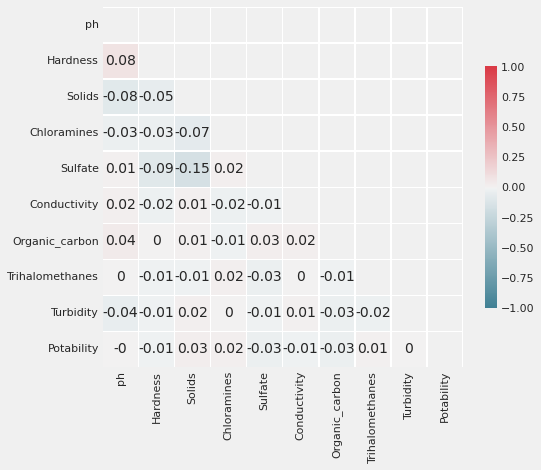

In [ ]:
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(8, 8))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols=['Potability']
X=df.drop(cols, axis=1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

           feature        VIF
0               ph  22.852476
1         Hardness  30.840673
2           Solids   6.969494
3      Chloramines  19.583666
4          Sulfate  56.235910
5     Conductivity  25.978045
6   Organic_carbon  18.697147
7  Trihalomethanes  17.365660
8        Turbidity  24.131537


## Modelling

In [ ]:
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(style="whitegrid")

plt.style.use('fivethirtyeight')

In [ ]:
x = df.drop("Potability", axis=1)
y = df.Potability
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score

def clf_scores(clf, y_predicted):
    # Accuracy
    acc_train = clf.score(X_train, y_train)*100
    acc_test = clf.score(X_test, y_test)*100
    
    roc = roc_auc_score(y_test, y_predicted)*100 
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm = confusion_matrix(y_test, y_predicted)
    correct = tp + tn
    incorrect = fp + fn
    d=[acc_train, acc_test,  roc, correct, incorrect,  cm]
    index=["acc_train",'Test Accuracy',"Roc Score","Correct","Incorrect","Confusion"  ]
    output=pd.DataFrame(data=d, index=index)
    output.head()
    d=sns.heatmap(cm, annot=True)
    dd=plot_roc_curve(clf, X_train, y_train)
    ddd=plot_precision_recall_curve(clf, X_train, y_train)

    return output,d, dd, ddd

### 1. Random Forest

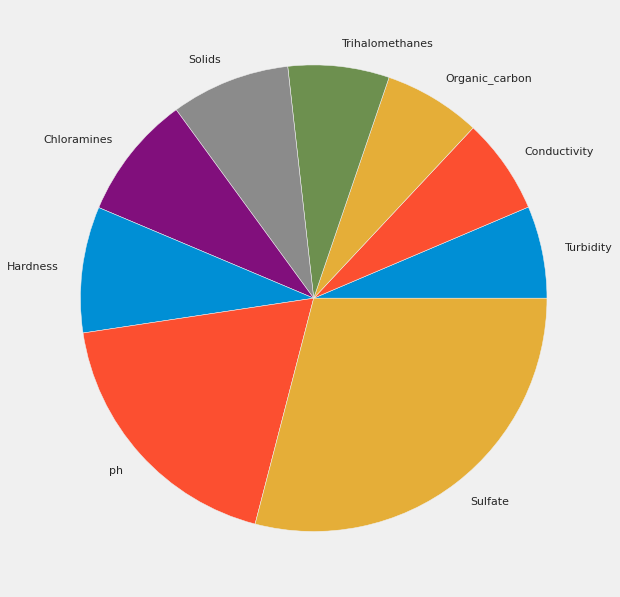

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clasification = RandomForestClassifier()
clasification.fit(x,y)

variables = x.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(7,10))
plt.pie(values, labels=labels)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



(                                     0
acc_train                          100
Test Accuracy                  80.7082
Roc Score                      77.1121
Correct                            661
Incorrect                          158
Confusion      [[468, 42], [116, 193]], <matplotlib.axes._subplots.AxesSubplot object at 0x7f212b669110>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f212b5f5090>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7f212b5c3e90>)


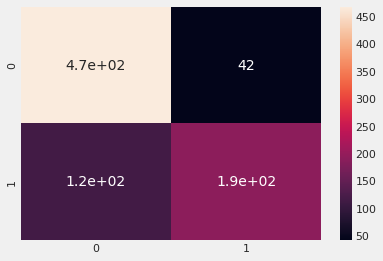

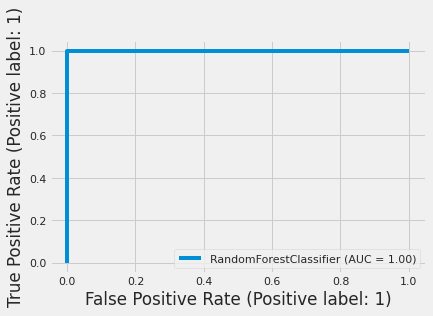

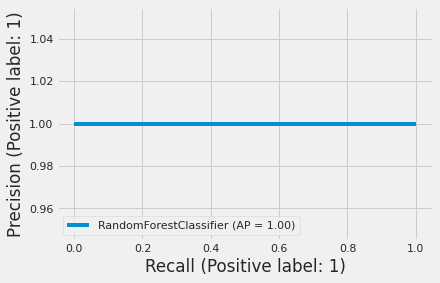

In [ ]:
# 2 Random Forest
#An ROC curve (receiver operating characteristic curve)
# is a graph showing the performance of a classification model at all classification thresholds.
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

Y_pred_rf = clf_rf.predict(X_test)
print(clf_scores(clf_rf, Y_pred_rf))

### 2. XGBoost

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



(                                     0
acc_train                      85.6736
Test Accuracy                  77.8999
Roc Score                      72.8165
Correct                            638
Incorrect                          181
Confusion      [[477, 33], [148, 161]], <matplotlib.axes._subplots.AxesSubplot object at 0x7f212b4dfbd0>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f2139fb6f90>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7f212b452d90>)


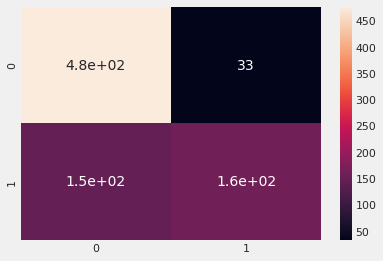

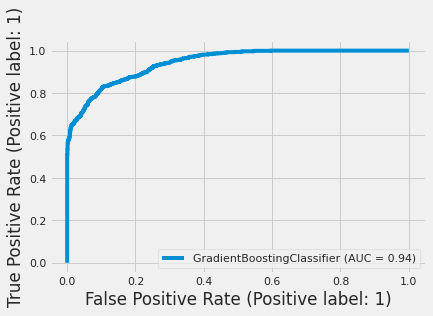

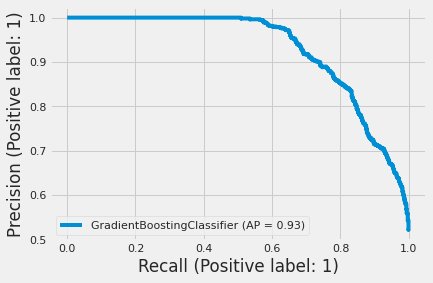

In [ ]:
# 3 XGboost
from sklearn.ensemble import GradientBoostingClassifier
clf_xg = GradientBoostingClassifier()
clf_xg.fit(X_train, y_train)

Y_pred_xg = clf_xg.predict(X_test)
print(clf_scores(clf_xg, Y_pred_xg))